Ініціалізація середовища

In [36]:
from diffusers import StableDiffusionPipeline
import torch

In [37]:
pipe = StableDiffusionPipeline.from_pretrained(
    'CompVis/stable-diffusion-v1-4', torch_dtype=torch.float16
).to('cuda')


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Генерація зображення за текстом

In [38]:
prompt = "a futuristic city at sunset, in the style of Studio Ghibli"
image = pipe(prompt).images[0]
image.show()


  0%|          | 0/50 [00:00<?, ?it/s]

Експерименти з параметрами

In [39]:
image = pipe(
    prompt=prompt,
    negative_prompt="blurry, distorted, low quality, bad anatomy",  # Чого уникати
    num_inference_steps=50,       # Більше кроків — краща якість
    guidance_scale=8.5,           # Сила впливу тексту (7.5-12 — добре)
    height=512,                   # Висота зображення
    width=768,                    # Ширина зображення
    generator=torch.manual_seed(43)  # Seed для повторюваності результату
).images[0]

image.save('generated_image.png')

  0%|          | 0/50 [00:00<?, ?it/s]

Генерація серії зображень за різними описами

In [40]:
prompts = [
    'a fantasy castle in the clouds',
    'a robot painting a self-portrait',
    'a cat surfing a wave in the ocean, digital art',
    'a fire-breathing dragon flying over a burning village, epic scale, fantasy concept art',
    'a space station orbiting a gas giant, ultra detailed, sci-fi concept art',
    'an abandoned gothic castle in the mountains, foggy atmosphere, photorealistic'
]
for p in prompts:
    img = pipe(p).images[0]
    img.save(p.replace(' ', '_') + '.png')


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

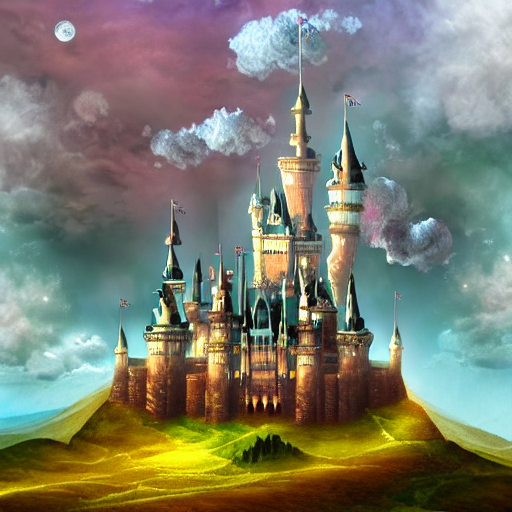

In [41]:
from IPython.display import Image, display
display(Image(filename='a_fantasy_castle_in_the_clouds.png'))


# Котрольні запитання

1. У чому полягає принцип роботи diffusion models?

Diffusion models (дифузійні моделі) ґрунтуються на ідеї поступової деградації та відновлення даних. У процесі навчання модель навчається поступово додавати шум до зображення (forward process) та навпаки — відновлювати зображення з шуму (reverse process). Під час генерації модель стартує з випадкового шуму та крок за кроком очищає його, доки не отримає нове зображення, яке відповідає розподілу даних, на яких вона була навчена.

2. Що таке forward та reverse процес у diffusion?
Forward процес — це додавання випадкового гаусівського шуму до зображення на кожному кроці, що поступово перетворює його на повністю зашумлене зображення (майже білий шум). 

Reverse процес — це навчений за допомогою глибокої нейромережі процес "очищення" цього шуму, під час якого модель крок за кроком реконструює реалістичне зображення з початкового шуму.

3. Які параметри впливають на результат генерації?

На якість та характер згенерованого зображення впливають такі параметри: кількість кроків дифузії, тип шуму, параметри моделі (архітектура, кількість шарів, об’єм тренувального датасету), scheduler (розклад видалення шуму), seed (початкове значення генератора випадкових чисел), а також текстовий промт у випадку текст-до-зображення моделей.

4. Як текстовий опис перетворюється у зображення?

У моделях текст-до-зображення, текстовий опис кодується за допомогою мовної моделі (зазвичай CLIP або Transformer) у векторне представлення (embedding). Це embedding слугує умовою для генерації: воно спрямовує дифузійну модель під час reverse процесу, щоб створене зображення відповідало змісту тексту.

5. Чим diffusion models відрізняються від GAN?

Diffusion models мають стабільніший процес навчання і генерують зображення поступово, через багато кроків, з покращенням якості на кожному етапі. Натомість GAN (Generative Adversarial Networks) складаються з генератора та дискримінатора, які змагаються між собою, що часто призводить до нестабільності або mode collapse. Diffusion models можуть забезпечити вищу якість зображень і краще контролювати результати генерації.

